In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as scp

#### Combining Datasets

In [27]:
# Read dataset and impute the missing values
from sklearn.impute import KNNImputer
df50 = pd.read_csv("../1950.csv")

genreCat = ["adult standards", "brill building pop", "british comedy", "british dance band", "classic soul", "classic uk pop", "deep adult standards", "doo-wop", "louisiana blues", "merseybeat", "yodeling"]


df50["genre"] = df50["genre"].astype("category")
df50["genre_cat"] = df50["genre"].cat.codes

df50.loc[df50["genre_cat"] == -1, "genre_cat"] = np.nan

imputer = KNNImputer(n_neighbors=5)
dfImputed = imputer.fit_transform(df50.iloc[:,4:])

df50["genre"] = [genreCat[int(round(dfImputed[i][-1],0))] for i in range(len(dfImputed))]
df50["decade"] = ["1950" for i in range(len(df50))]
df50 = df50.drop(columns=["genre_cat"])

display(df50)

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award,decade
0,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72,0.0,1950
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62,0.0,1950
2,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61,0.0,1950
3,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60,0.0,1950
4,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60,0.0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Collette,Billy Fury,adult standards,1982,155,44,55,-10,10,73,112,82,4,27,0.0,1950
69,Happy Days And Lonely Nights,Suzi Miller And Johnson Brothers,adult standards,2012,142,38,65,-8,13,69,146,43,3,27,0.0,1950
70,Stairway Of Love,Terry Dene,classic soul,2015,93,62,62,-7,25,86,120,55,4,27,0.0,1950
71,I've Waited So Long,Anthony Newley,british dance band,2012,137,36,27,-15,25,28,165,64,4,26,0.0,1950


In [28]:
df80 = pd.read_csv("../1980.csv")

genreDictio = {}


df80["genre"] = df80["genre"].astype("category")
df80["genre_cat"] = df80["genre"].cat.codes

df80.loc[df80["genre_cat"] == -1, "genre_cat"] = np.nan

genres = df80["genre"].unique().dropna()
genreCode = df80["genre"].dropna().cat.codes.unique()

for i in range(len(genres)):
    genreDictio[genreCode[i]] = genres[i]

imputer = KNNImputer(n_neighbors=5)
dfImputed = imputer.fit_transform(df80.iloc[:,4:])

df80["genre"] = [genreDictio[int(round(dfImputed[i][-1],0))] for i in range(len(dfImputed))]
df80["decade"] = ["1980" for i in range(len(df80))]
df80 = df80.drop(columns=["genre_cat"])

display(df80)


,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award,decade
0,Livin' On A Prayer,Bon Jovi,glam metal,1986,123,89,53,-4,29,80,249,8,3,83,0.0,1980
1,Africa,TOTO,album rock,1982,93,37,67,-18,5,73,296,26,3,83,1.0,1980
2,Another One Bites The Dust - Remastered 2011,Queen,glam rock,1980,110,53,93,-6,16,75,215,11,16,82,1.0,1980
3,Break My Stride,Matthew Wilder,new wave pop,1983,110,59,92,-11,9,83,184,20,6,81,1.0,1980
4,I Wanna Dance with Somebody (Who Loves Me),Whitney Houston,dance pop,1987,119,82,71,-9,9,87,291,21,5,80,1.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Cold as Ice - 2008 Remaster,Foreigner,album rock,2008,131,71,55,-5,14,51,200,6,3,57,0.0,1980
101,Zulu Nation Throw Down,Afrika Bambaataa,bronx hip hop,2015,108,95,85,-4,10,91,433,76,19,50,0.0,1980
102,It's Only Love - 2008 Remaster,Simply Red,british soul,2008,92,88,67,-5,4,75,299,51,4,50,0.0,1980
103,Lucky Star,Madonna,dance pop,1983,117,81,80,-5,22,93,338,20,4,46,0.0,1980


In [29]:
## Label encoding
df90 = pd.read_csv("../1990.csv")

genre_code_dict = {}
genres = df90["genre"].dropna().unique()
df90["genre"] = df90["genre"].astype("category")
df90["genre_label"] = df90["genre"].cat.codes
for genre in genres:
    genre_code_dict[df90[df90["genre"] == genre].iloc[0]["genre_label"]] = genre

df90.loc[df90["genre_label"] == -1, "genre_label"] = np.nan

imputer_df = imputer.fit_transform(df90.iloc[:,4:])

df90["genre"] = [genre_code_dict[int(round(imputer_df[i][-1]))] for i in range(len(imputer_df))]
df90 = df90.drop(columns=["genre_label"])
df90["decade"] = ["1990" for i in range(len(df90))]

display(df90)


,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award,decade
0,No Scrubs,TLC,atl hip hop,1999,93,68,74,-4,7,59,214,3,10,79,0.0,1990
1,I Want It That Way,Backstreet Boys,boy band,2001,99,70,69,-6,16,48,214,22,3,76,0.0,1990
2,It Wasn't Me,Shaggy,dance pop,2000,95,61,85,-5,31,65,228,6,7,76,0.0,1990
3,"Because You Loved Me (Theme from ""Up Close and...",CÃ©line Dion,canadian pop,1996,120,47,61,-10,10,18,274,31,3,74,0.0,1990
4,Big Poppa - 2005 Remaster,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27,74,0.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4,50,0.0,1990
84,If You Ever,East 17,boy band,1996,140,68,58,-9,31,57,255,18,3,48,0.0,1990
85,Pump Up The Jam,Technotronic,eurodance,2019,125,84,89,-9,5,72,320,1,7,46,0.0,1990
86,Doin' It,LL Cool J,east coast hip hop,1996,95,53,81,-12,12,62,294,34,19,46,0.0,1990


In [30]:
df60 = pd.read_csv("../1960.csv")
df60["decade"] = ["1960" for i in range(len(df60))]
                  
df70 = pd.read_csv("../1970.csv")
df70["decade"] = ["1970" for i in range(len(df70))]

df00 = pd.read_csv("../2000.csv")
df00["decade"] = ["2000" for i in range(len(df00))]

df10 = pd.read_csv("../2010.csv")
df10["decade"] = ["2010" for i in range(len(df10))]

dfTop10 = pd.read_csv("../top10s.csv")
df10["decade"] = ["2010" for i in range(len(df10))]

frames = [df50, df60, df70, df80, df90, df00, df10]
aggregated_df = pd.concat(frames).drop_duplicates()
display(aggregated_df)

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award,decade
0,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72,0.0,1950
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62,0.0,1950
2,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61,0.0,1950
3,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60,0.0,1950
4,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60,0.0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Dynamite,Taio Cruz,dance pop,2011,120,79,76,-4,3,87,203,0,8,56,0.0,2010
97,Break Your Heart,Taio Cruz,dance pop,2011,122,89,67,-5,24,68,185,0,3,54,0.0,2010
98,Summer Air,ItaloBrothers,dance pop,2017,102,75,76,-4,8,49,184,6,7,43,0.0,2010
99,All I Wanna Do,Martin Jensen,big room,2016,112,79,73,-4,7,56,194,16,7,32,0.0,2010


Text(0.5, 1.0, 'Correlation matrix')

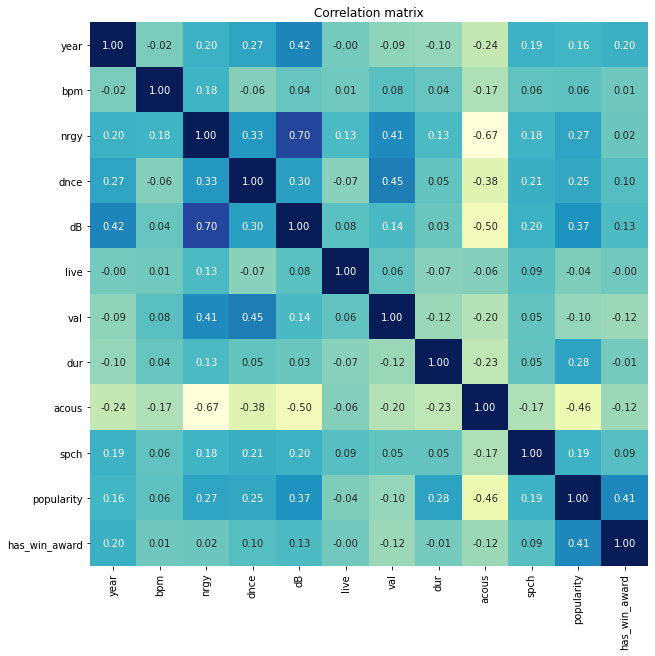

In [31]:
plt.figure(figsize=(10, 10))

sns.heatmap(
    aggregated_df.select_dtypes(np.number).corr(),
    annot=True,
    cbar=False,
    fmt="0.2f",
    cmap="YlGnBu",
    xticklabels=aggregated_df.select_dtypes(np.number).columns,
    yticklabels=aggregated_df.select_dtypes(np.number).columns
    
    )
plt.title("Correlation matrix")

#### Descriptive Statistics

Text(0.5, 1.0, 'Correlation matrix')

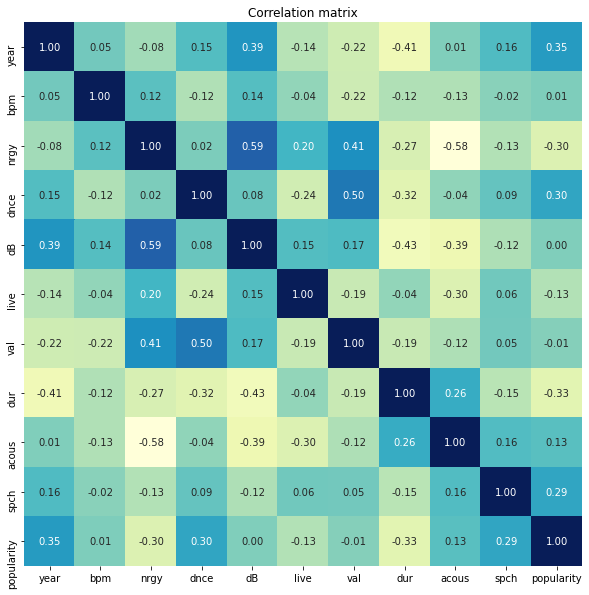

In [32]:
award_winning_df = aggregated_df[aggregated_df["has_win_award"] == 1.0].drop(columns=["has_win_award"])

plt.figure(figsize=(10, 10))

sns.heatmap(
    award_winning_df.select_dtypes(np.number).corr(),
    annot=True,
    cbar=False,
    fmt="0.2f",
    cmap="YlGnBu",
    xticklabels=award_winning_df.select_dtypes(np.number).columns,
    yticklabels=award_winning_df.select_dtypes(np.number).columns
    
    )
plt.title("Correlation matrix")

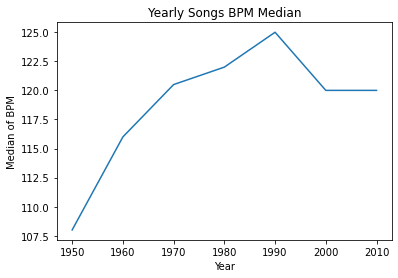

In [33]:
dfs = ["bpm", "dnce", "dB", "live", "val", "dur", "acous", "spch", "popularity"]
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['bpm'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of BPM')
plt.title('Yearly Songs BPM Median')
plt.show()

From the visualization above, we can see the median of the bpm attribute of the songs from 1950-2010. The bpm attribute describes the beat per minute of the song. It can be seen that, overall, the bpm of the songs increases within the 6 decades. That is, songs are becoming faster. However, there is a slight decrease by 5 beats from the 1990s to the 200s, where it plateaus in the 2000s to the 2010s.

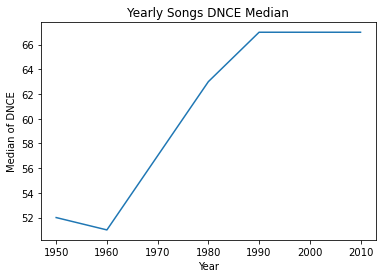

In [34]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['dnce'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of DNCE')
plt.title('Yearly Songs DNCE Median')
plt.show()

The dnce value overall increases within the 6 of the most popular and iconic songs from each decade increases from 1960s to 2000s after experiencing a slight decrease in the 1950s. This implies that songs (the most popular and iconic songs from each decade) are becoming more danceable.

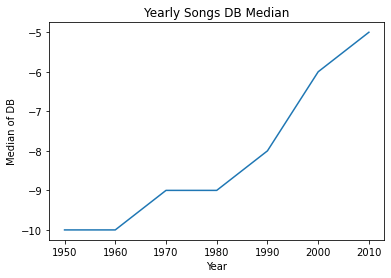

In [35]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['dB'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of DB')
plt.title('Yearly Songs DB Median')
plt.show()

From the visualization above, we can see the median of the DB attribute of the songs from 1950-2010. The db attribute describes the decibel of the song, that is, the higher the value, the louder the song will be. It can be seen that the median of the db attribute of the songs experiences an increasing trend within the 6 decades. Within the 1950s to the 1960s, there is no major changes that is observed at the median level. It then experiences a slight increase in the 1960s to the 1970s and in the 1980s to the 1990s. The most significant increase can be seen in the 1990s to 2000s, where the median increases by 2 db.

From this observation, it can be observed that, in overall, songs are becoming louder.

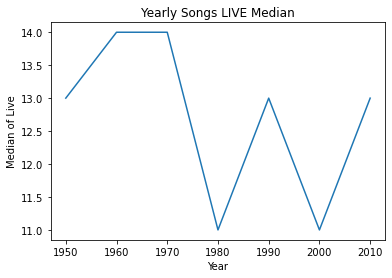

In [36]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['live'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of Live')
plt.title('Yearly Songs LIVE Median')
plt.show()

From the visualization above, we can see the median of the live attribute of the songs from 1950-2010. The live attribute describes how likely the song is a live recording. Although there is no a uniform trend within the 6 decades, it is observable there is a decrease in trend for live recorded songs in the 1970s to the 1980s.

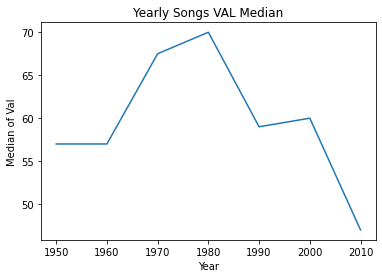

In [37]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['val'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of Val')
plt.title('Yearly Songs VAL Median')
plt.show()

From the line plot above we see the median of the val attribute of every song from 1950-2010. The val attribute describes how positive the mood for the song is. We see that initially, between 1950 and 1980, songs were progressively becoming more positive. However, the opposite was seen during the following years. We see that the songs were giving less of a positive mood after 1980.

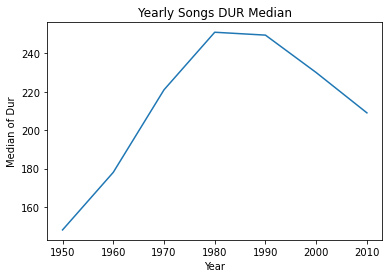

In [38]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['dur'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of Dur')
plt.title('Yearly Songs DUR Median')
plt.show()

The line plot above displays the median of the dur attribute of every song between 1950-2010. The dur attribute describes the duration of the song in seconds. We see that at first there was a steady increase in duration between 1950-1980, peaking at 251. From 1980 to 2010 we see that the duration of songs are becoming shorter, where the trend is going back towards song durations prior to 1980.

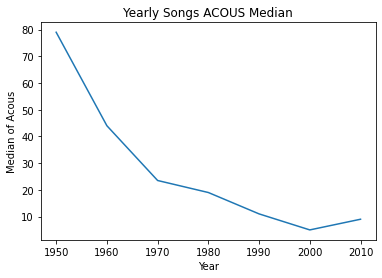

In [39]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['acous'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of Acous')
plt.title('Yearly Songs ACOUS Median')
plt.show()

The line plot above displays the median of the acous attribute of every song between 1950-2010. The acous attribute describes acoustic the song is. The trend that we can observe looks pretty obvious since we see that from 1950-2000 there has always been a decrease in the median of the acous attribute, meaning that songs are progressively getting less and less acoustiv throughout the decades, with only a slight increase from 2000 to 2010.

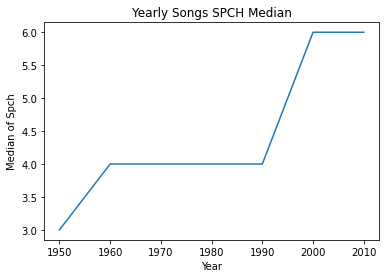

In [40]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['spch'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of Spch')
plt.title('Yearly Songs SPCH Median')
plt.show()

The line plot above displays the median of the spch attribute of every song between 1950-2010. The spch attribute describes the amount of spoken words there is in a song. There was an increase in spoken words in a song between 1950 and 1960, but the most interesting part that it plateaus between 1960 and 1990. During the 2000s the value jumped from 4 all the way up to 6, where it stayed the same during the following year (2010).

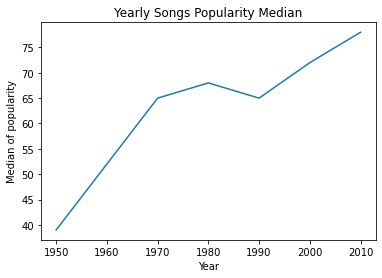

In [41]:
year = ['1950', '1960', '1970', '1980', '1990', '2000', '2010']

medians = aggregated_df.groupby('decade')['popularity'].median()

plt.plot(year, medians)
plt.xlabel('Year')
plt.ylabel('Median of popularity')
plt.title('Yearly Songs Popularity Median')
plt.show()

The line plot above displays the median of the popularity attribute of every song in the combined data set from the 1950s to the 2010s. The popularity attribute describes how popular a song is, where a higher popularity value implies a higher popularity for the song. 

Note that, popularity is assumed to be measured from the this decade's audiences. This assumption is taken as the songs are listened through spotify.

From the line plot above, it can be seen that the popularity attribute of the song majorly increases in the 1950s to the 1970s. It then increases slightly from 65 to 70 in the 1970s to the 1980s before decreasing back in within 1980s to 1990s. Finally, in 1990s onward, the popularity attribute of the most popular and iconic songs in the corresponding decade increases.

The overall increase in song popularity implies that the recent songs are more popular than their predecesors to the current audience. This is likely due to a generation gap between the audience and the song, where songs closer to the current audiences' generation tend to relate more and fit the culture better.

## Data Preprocessing

We must take into account our business objectives, being to predict the popularity based on some of the qualities present in the dataframe.

A song's title is not part of the song's main characteristics that we want to analyze (it does not relate to the actual sound produced or the actual content consumed by the audience). Therefore, the title column will not be selected as the feature in our regression model.

Next, the artist will not been selected to be used in our regression model. Despite the artist's voice has a significant impact in the song and sound production, we aim to predict the popularity measure of an arbitrary song that can be created by any artist. In this model, we aim to abstract away the artist's popularity factor into the song's popularity. That is, songs are considered as artist-independent. We agreed on making a model to ensure that an artist, regardless of popularity, is able to create a song this popular.

Then, we also decided not to include year in our regression model as our model is intended for the current and future artists who aim to produce popular songs. For instance, if a song created in the 1950s is has a higher popularity value, it will not be relevant as artists nowadays can not situate the song to be released in the past. The removal of the "decade" column follows a similar argument.

Afterwards, we chose not to consider whether an artist have won an award. Firstly, it is unrealistic for an unreleased or recently released song to have won an award. Furthermore, we expect our model to predict the popularity of a song purely based on the internal song qualities itself. 

Finally, we chose not to consider whether the song is of a certain genre. This is due to the reason that we can't configure a genre of a song. However, we are able to configure the song to be in a certain genre since a genre can be defined by its bpms, dancability and other internal features of the song.

In [42]:
# Drop the features (Song title, artist, year, decade, has_win_awards)
aggregated_df_dropped = aggregated_df.drop(columns=["title", "artist", "year", "decade", "has_win_award", "genre"])

Also, we did not remove any other features based on correlation. Usually, we would want to remove features with high Pearson correlation coefficients to further optimize the model (not taking into account multiple attributes which correlates strongly and therefore not using it twice increase the speed of training such models.). However, we concluded from the heat map that none of the attributes are correlated strongly enough to warrant the removal of one of them (our rule of thumb is that 2 attributes are strongly correlated if their Pearson score >= 0.9. Futhermore, the dataset only contains 10 features to be analyzed and/or regressed. Hence, removing a somewhat weakly correlating features will only result in data loss. 

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
scaler = MinMaxScaler()

scaler.fit(aggregated_df_dropped)

aggregated_scaled = scaler.transform(aggregated_df_dropped)
aggregated_df_scaled = pd.DataFrame(aggregated_scaled, columns=["bpm", "nrgy", "dnce", "dB", "live", "val", "dur", "acous", "spch", "popularity"])

aggregated_df_scaled

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,0.394161,0.297872,0.474359,0.652174,0.087912,0.440860,0.138015,0.75,0.022222,0.676471
1,0.839416,0.297872,0.307692,0.565217,0.769231,0.774194,0.060533,0.86,0.044444,0.529412
2,0.138686,0.457447,0.102564,0.652174,0.351648,0.365591,0.154964,0.81,0.044444,0.514706
3,0.145985,0.393617,0.397436,0.521739,0.109890,0.645161,0.128329,0.70,0.088889,0.500000
4,0.124088,0.340426,0.487179,0.652174,0.120879,0.602151,0.145278,0.67,0.022222,0.500000
...,...,...,...,...,...,...,...,...,...,...
663,0.423358,0.776596,0.743590,0.869565,0.010989,0.870968,0.254237,0.00,0.133333,0.441176
664,0.437956,0.882979,0.628205,0.826087,0.241758,0.666667,0.210654,0.00,0.022222,0.411765
665,0.291971,0.734043,0.743590,0.869565,0.065934,0.462366,0.208232,0.06,0.111111,0.250000
666,0.364964,0.776596,0.705128,0.869565,0.054945,0.537634,0.232446,0.16,0.111111,0.088235


Moreover, we also need to normalize the dataset such that all of the scores are bound to similar scales. Note that in the dataset, there are several features, such as the song duration (dur) and beats per minute (bpm) which is much bigger compared to the values of the other features. If the dataset were not to be scaled, the model designed will emphasize more on those aforementioned features, hence it will result in a big bias towards those features. Consequently, our regression model could be inaccurate.

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [45]:
X = aggregated_df_scaled.drop('popularity', axis=1)
Y = aggregated_df_scaled['popularity']


X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=50)
X_train

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
531,0.591241,0.787234,0.782051,0.826087,0.307692,0.838710,0.496368,0.19,0.177778
264,0.328467,0.425532,0.320513,0.739130,0.120879,0.677419,0.375303,0.60,0.022222
593,0.437956,0.797872,0.884615,0.869565,0.065934,0.978495,0.244552,0.38,0.088889
454,0.583942,0.840426,0.666667,0.739130,0.186813,0.956989,0.297821,0.38,0.022222
448,0.189781,0.872340,0.397436,0.782609,0.120879,0.580645,0.510896,0.08,0.044444
...,...,...,...,...,...,...,...,...,...
70,0.226277,0.595745,0.564103,0.739130,0.252747,0.860215,0.053269,0.55,0.044444
132,0.343066,0.457447,0.423077,0.652174,0.076923,0.462366,0.167070,0.36,0.022222
289,0.846715,0.202128,0.282051,0.434783,0.087912,0.075269,0.401937,0.80,0.022222
109,0.452555,0.946809,0.487179,0.739130,0.043956,0.892473,0.079903,0.05,0.044444


In [46]:
model = RandomForestRegressor(n_estimators=700)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
Y_pred = model.predict(X_train)
data = pd.DataFrame({'Popularity (predicted)': y_pred, 'Popularity (actual)': y_test, })
data


,Popularity (predicted),Popularity (actual)
82,0.539244,0.676471
127,0.356513,0.352941
407,0.674769,0.617647
157,0.505420,0.220588
208,0.632185,0.617647
...,...,...
409,0.676996,0.617647
151,0.346029,0.235294
522,0.603424,0.661765
339,0.610651,0.588235


In [48]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print("TEST SCORE")
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)


TEST SCORE
MAE: 0.12100040762573701
MSE: 0.024804371868369885
RMSE: 0.15749403756450556
R2: 0.3251939726747005


In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
X = aggregated_df_scaled.drop('popularity', axis=1)
Y = aggregated_df_scaled['popularity']


X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=50)
X_train

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
531,0.591241,0.787234,0.782051,0.826087,0.307692,0.838710,0.496368,0.19,0.177778
264,0.328467,0.425532,0.320513,0.739130,0.120879,0.677419,0.375303,0.60,0.022222
593,0.437956,0.797872,0.884615,0.869565,0.065934,0.978495,0.244552,0.38,0.088889
454,0.583942,0.840426,0.666667,0.739130,0.186813,0.956989,0.297821,0.38,0.022222
448,0.189781,0.872340,0.397436,0.782609,0.120879,0.580645,0.510896,0.08,0.044444
...,...,...,...,...,...,...,...,...,...
70,0.226277,0.595745,0.564103,0.739130,0.252747,0.860215,0.053269,0.55,0.044444
132,0.343066,0.457447,0.423077,0.652174,0.076923,0.462366,0.167070,0.36,0.022222
289,0.846715,0.202128,0.282051,0.434783,0.087912,0.075269,0.401937,0.80,0.022222
109,0.452555,0.946809,0.487179,0.739130,0.043956,0.892473,0.079903,0.05,0.044444


In [51]:
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.3528384032796662

In [52]:
print("Koefisien model regresi : " + str(reg.coef_))
print("Intercept model regresi : " + str(reg.intercept_))

Koefisien model regresi : [ 0.03145487 -0.09918181  0.16472003  0.27325787 -0.05822688 -0.15441478
  0.23903149 -0.28280682  0.10245238]
Intercept model regresi : 0.40923133515208965


In [55]:
y_pred = reg.predict(X_test)
Y_pred = reg.predict(X_train)
data = pd.DataFrame({'Popularity (predicted)': y_pred, 'Popularity (actual)': y_test, })
data

,Popularity (predicted),Popularity (actual)
82,0.494723,0.676471
127,0.397599,0.352941
407,0.665912,0.617647
157,0.474569,0.220588
208,0.592044,0.617647
...,...,...
409,0.712540,0.617647
151,0.358998,0.235294
522,0.746007,0.661765
339,0.636164,0.588235


In [56]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)

MAE: 0.13340301840268765
MSE: 0.028442501664610372
RMSE: 0.16864904881027457
R2: 0.22621819825384282


In [57]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor()
cat.fit(X_train,y_train,early_stopping_rounds=10)

Learning rate set to 0.037079
0:	learn: 0.2014564	total: 67.3ms	remaining: 1m 7s
1:	learn: 0.1993253	total: 68.7ms	remaining: 34.3s
2:	learn: 0.1971373	total: 69.8ms	remaining: 23.2s
3:	learn: 0.1950788	total: 70.8ms	remaining: 17.6s
4:	learn: 0.1933028	total: 71.7ms	remaining: 14.3s
5:	learn: 0.1912803	total: 72.8ms	remaining: 12.1s
6:	learn: 0.1895603	total: 73.6ms	remaining: 10.4s
7:	learn: 0.1879738	total: 74.3ms	remaining: 9.21s
8:	learn: 0.1862887	total: 75ms	remaining: 8.26s
9:	learn: 0.1843496	total: 75.8ms	remaining: 7.5s
10:	learn: 0.1827136	total: 76.7ms	remaining: 6.89s
11:	learn: 0.1812534	total: 77.6ms	remaining: 6.39s
12:	learn: 0.1796300	total: 78.3ms	remaining: 5.95s
13:	learn: 0.1782296	total: 79ms	remaining: 5.57s
14:	learn: 0.1767129	total: 79.7ms	remaining: 5.23s
15:	learn: 0.1753404	total: 80.4ms	remaining: 4.94s
16:	learn: 0.1740558	total: 81ms	remaining: 4.69s
17:	learn: 0.1729562	total: 81.7ms	remaining: 4.46s
18:	learn: 0.1716249	total: 82.3ms	remaining: 4.25s

280:	learn: 0.1028551	total: 282ms	remaining: 723ms
281:	learn: 0.1027386	total: 284ms	remaining: 723ms
282:	learn: 0.1026753	total: 285ms	remaining: 722ms
283:	learn: 0.1026161	total: 286ms	remaining: 722ms
284:	learn: 0.1025812	total: 287ms	remaining: 720ms
285:	learn: 0.1024546	total: 288ms	remaining: 719ms
286:	learn: 0.1022556	total: 289ms	remaining: 717ms
287:	learn: 0.1021512	total: 290ms	remaining: 716ms
288:	learn: 0.1019308	total: 291ms	remaining: 715ms
289:	learn: 0.1018565	total: 291ms	remaining: 714ms
290:	learn: 0.1016559	total: 292ms	remaining: 712ms
291:	learn: 0.1014707	total: 293ms	remaining: 710ms
292:	learn: 0.1014260	total: 296ms	remaining: 713ms
293:	learn: 0.1011529	total: 297ms	remaining: 712ms
294:	learn: 0.1010722	total: 297ms	remaining: 711ms
295:	learn: 0.1008545	total: 299ms	remaining: 710ms
296:	learn: 0.1006844	total: 299ms	remaining: 709ms
297:	learn: 0.1005090	total: 301ms	remaining: 708ms
298:	learn: 0.1002815	total: 301ms	remaining: 706ms
299:	learn: 

527:	learn: 0.0700744	total: 449ms	remaining: 402ms
528:	learn: 0.0699894	total: 451ms	remaining: 401ms
529:	learn: 0.0698459	total: 452ms	remaining: 400ms
530:	learn: 0.0697142	total: 452ms	remaining: 399ms
531:	learn: 0.0696890	total: 453ms	remaining: 398ms
532:	learn: 0.0695237	total: 454ms	remaining: 397ms
533:	learn: 0.0693787	total: 454ms	remaining: 396ms
534:	learn: 0.0692871	total: 455ms	remaining: 395ms
535:	learn: 0.0691810	total: 455ms	remaining: 394ms
536:	learn: 0.0690401	total: 456ms	remaining: 393ms
537:	learn: 0.0689511	total: 457ms	remaining: 392ms
538:	learn: 0.0687789	total: 458ms	remaining: 392ms
539:	learn: 0.0687267	total: 458ms	remaining: 390ms
540:	learn: 0.0685422	total: 459ms	remaining: 389ms
541:	learn: 0.0685111	total: 460ms	remaining: 388ms
542:	learn: 0.0683651	total: 460ms	remaining: 387ms
543:	learn: 0.0681743	total: 461ms	remaining: 386ms
544:	learn: 0.0681633	total: 463ms	remaining: 387ms
545:	learn: 0.0680648	total: 464ms	remaining: 386ms
546:	learn: 

792:	learn: 0.0493340	total: 620ms	remaining: 162ms
793:	learn: 0.0492312	total: 620ms	remaining: 161ms
794:	learn: 0.0491565	total: 621ms	remaining: 160ms
795:	learn: 0.0491058	total: 622ms	remaining: 159ms
796:	learn: 0.0490977	total: 622ms	remaining: 158ms
797:	learn: 0.0490064	total: 623ms	remaining: 158ms
798:	learn: 0.0489607	total: 624ms	remaining: 157ms
799:	learn: 0.0488688	total: 625ms	remaining: 156ms
800:	learn: 0.0488638	total: 625ms	remaining: 155ms
801:	learn: 0.0487880	total: 626ms	remaining: 155ms
802:	learn: 0.0487474	total: 627ms	remaining: 154ms
803:	learn: 0.0486510	total: 627ms	remaining: 153ms
804:	learn: 0.0485789	total: 628ms	remaining: 152ms
805:	learn: 0.0485574	total: 629ms	remaining: 151ms
806:	learn: 0.0485353	total: 630ms	remaining: 151ms
807:	learn: 0.0485079	total: 633ms	remaining: 150ms
808:	learn: 0.0485040	total: 634ms	remaining: 150ms
809:	learn: 0.0484427	total: 635ms	remaining: 149ms
810:	learn: 0.0484133	total: 636ms	remaining: 148ms
811:	learn: 

In [58]:
y_pred = cat.predict(X_test)
Y_pred = cat.predict(X_train)
data = pd.DataFrame({'Popularity (predicted)': y_pred, 'Popularity (actual)': y_test, })
data

,Popularity (predicted),Popularity (actual)
82,0.447662,0.676471
127,0.339418,0.352941
407,0.635228,0.617647
157,0.548291,0.220588
208,0.609820,0.617647
...,...,...
409,0.727142,0.617647
151,0.333969,0.235294
522,0.571509,0.661765
339,0.599746,0.588235


In [59]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)

MAE: 0.1204901707071559
MSE: 0.025041851489706564
RMSE: 0.1582461736968909
R2: 0.31873330998606886


# Hyperparameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
cbr = CatBoostRegressor()
grid = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }
gscv = GridSearchCV (estimator = cbr, param_grid = grid, cv = 5)

#fit the model
gscv.fit(X,Y)

print(gscv.best_params_)

0:	learn: 0.1673153	total: 666us	remaining: 19.3ms
1:	learn: 0.1670597	total: 2.19ms	remaining: 30.7ms
2:	learn: 0.1668880	total: 2.82ms	remaining: 25.4ms
3:	learn: 0.1666321	total: 3.5ms	remaining: 22.8ms
4:	learn: 0.1664000	total: 4.25ms	remaining: 21.3ms
5:	learn: 0.1662169	total: 4.98ms	remaining: 19.9ms
6:	learn: 0.1660091	total: 5.87ms	remaining: 19.3ms
7:	learn: 0.1658250	total: 6.44ms	remaining: 17.7ms
8:	learn: 0.1655733	total: 7.23ms	remaining: 16.9ms
9:	learn: 0.1653168	total: 8ms	remaining: 16ms
10:	learn: 0.1650965	total: 8.51ms	remaining: 14.7ms
11:	learn: 0.1647986	total: 9.15ms	remaining: 13.7ms
12:	learn: 0.1645828	total: 9.79ms	remaining: 12.8ms
13:	learn: 0.1644002	total: 10.6ms	remaining: 12.2ms
14:	learn: 0.1641369	total: 11.4ms	remaining: 11.4ms
15:	learn: 0.1638685	total: 12.1ms	remaining: 10.6ms
16:	learn: 0.1636929	total: 15.7ms	remaining: 12ms
17:	learn: 0.1634069	total: 17.1ms	remaining: 11.4ms
18:	learn: 0.1631932	total: 17.9ms	remaining: 10.4ms
19:	learn: 0

19:	learn: 0.1585103	total: 14.4ms	remaining: 7.18ms
20:	learn: 0.1573707	total: 15ms	remaining: 6.44ms
21:	learn: 0.1563286	total: 15.7ms	remaining: 5.71ms
22:	learn: 0.1554045	total: 16.4ms	remaining: 4.98ms
23:	learn: 0.1541557	total: 16.9ms	remaining: 4.23ms
24:	learn: 0.1532035	total: 17.3ms	remaining: 3.46ms
25:	learn: 0.1523053	total: 17.8ms	remaining: 2.74ms
26:	learn: 0.1515406	total: 18.3ms	remaining: 2.03ms
27:	learn: 0.1507728	total: 18.8ms	remaining: 1.34ms
28:	learn: 0.1500190	total: 19.3ms	remaining: 667us
29:	learn: 0.1492067	total: 19.8ms	remaining: 0us
0:	learn: 0.2109776	total: 1.29ms	remaining: 37.3ms
1:	learn: 0.2074767	total: 2.23ms	remaining: 31.2ms
2:	learn: 0.2044070	total: 3.13ms	remaining: 28.2ms
3:	learn: 0.2016381	total: 3.98ms	remaining: 25.9ms
4:	learn: 0.1988927	total: 4.81ms	remaining: 24ms
5:	learn: 0.1965555	total: 5.7ms	remaining: 22.8ms
6:	learn: 0.1942606	total: 6.69ms	remaining: 22ms
7:	learn: 0.1917575	total: 7.28ms	remaining: 20ms
8:	learn: 0.18

6:	learn: 0.1800888	total: 4.57ms	remaining: 15ms
7:	learn: 0.1765352	total: 5.14ms	remaining: 14.1ms
8:	learn: 0.1731945	total: 5.66ms	remaining: 13.2ms
9:	learn: 0.1707752	total: 6.35ms	remaining: 12.7ms
10:	learn: 0.1686709	total: 6.87ms	remaining: 11.9ms
11:	learn: 0.1674319	total: 7.38ms	remaining: 11.1ms
12:	learn: 0.1655182	total: 7.91ms	remaining: 10.3ms
13:	learn: 0.1637746	total: 8.33ms	remaining: 9.52ms
14:	learn: 0.1621802	total: 8.73ms	remaining: 8.73ms
15:	learn: 0.1606167	total: 9.29ms	remaining: 8.13ms
16:	learn: 0.1591122	total: 9.82ms	remaining: 7.51ms
17:	learn: 0.1579684	total: 10.7ms	remaining: 7.12ms
18:	learn: 0.1564183	total: 11.4ms	remaining: 6.61ms
19:	learn: 0.1554798	total: 12ms	remaining: 6ms
20:	learn: 0.1545076	total: 12.6ms	remaining: 5.39ms
21:	learn: 0.1537481	total: 13.1ms	remaining: 4.75ms
22:	learn: 0.1530672	total: 13.9ms	remaining: 4.23ms
23:	learn: 0.1523240	total: 14.6ms	remaining: 3.65ms
24:	learn: 0.1512124	total: 15.5ms	remaining: 3.1ms
25:	l

20:	learn: 0.2006178	total: 14ms	remaining: 19.3ms
21:	learn: 0.2000261	total: 14.5ms	remaining: 18.5ms
22:	learn: 0.1994854	total: 15ms	remaining: 17.6ms
23:	learn: 0.1990020	total: 15.7ms	remaining: 17ms
24:	learn: 0.1984850	total: 16.3ms	remaining: 16.3ms
25:	learn: 0.1979973	total: 16.8ms	remaining: 15.5ms
26:	learn: 0.1975628	total: 17.4ms	remaining: 14.8ms
27:	learn: 0.1971168	total: 18ms	remaining: 14.1ms
28:	learn: 0.1966042	total: 18.5ms	remaining: 13.4ms
29:	learn: 0.1960960	total: 19ms	remaining: 12.7ms
30:	learn: 0.1956344	total: 19.4ms	remaining: 11.9ms
31:	learn: 0.1951582	total: 20.2ms	remaining: 11.4ms
32:	learn: 0.1946415	total: 20.7ms	remaining: 10.7ms
33:	learn: 0.1941182	total: 21.3ms	remaining: 10ms
34:	learn: 0.1936555	total: 21.8ms	remaining: 9.36ms
35:	learn: 0.1931946	total: 22.4ms	remaining: 8.7ms
36:	learn: 0.1927422	total: 23.5ms	remaining: 8.26ms
37:	learn: 0.1923122	total: 24.4ms	remaining: 7.71ms
38:	learn: 0.1918968	total: 24.9ms	remaining: 7.02ms
39:	le

17:	learn: 0.1744112	total: 9.81ms	remaining: 17.4ms
18:	learn: 0.1729847	total: 10.4ms	remaining: 17ms
19:	learn: 0.1719582	total: 10.9ms	remaining: 16.3ms
20:	learn: 0.1704076	total: 11.4ms	remaining: 15.8ms
21:	learn: 0.1691691	total: 12ms	remaining: 15.3ms
22:	learn: 0.1678430	total: 12.6ms	remaining: 14.8ms
23:	learn: 0.1669634	total: 13.2ms	remaining: 14.2ms
24:	learn: 0.1657964	total: 13.8ms	remaining: 13.8ms
25:	learn: 0.1648271	total: 14.3ms	remaining: 13.2ms
26:	learn: 0.1639447	total: 15ms	remaining: 12.8ms
27:	learn: 0.1630787	total: 15.5ms	remaining: 12.2ms
28:	learn: 0.1624581	total: 16.1ms	remaining: 11.6ms
29:	learn: 0.1615457	total: 16.6ms	remaining: 11ms
30:	learn: 0.1607304	total: 17ms	remaining: 10.4ms
31:	learn: 0.1600291	total: 17.5ms	remaining: 9.83ms
32:	learn: 0.1592149	total: 18.2ms	remaining: 9.38ms
33:	learn: 0.1584185	total: 19.1ms	remaining: 8.97ms
34:	learn: 0.1577729	total: 19.7ms	remaining: 8.43ms
35:	learn: 0.1571029	total: 20.3ms	remaining: 7.88ms
36:

16:	learn: 0.1591122	total: 13.1ms	remaining: 25.4ms
17:	learn: 0.1579684	total: 13.6ms	remaining: 24.2ms
18:	learn: 0.1564183	total: 14.1ms	remaining: 23ms
19:	learn: 0.1554798	total: 14.7ms	remaining: 22ms
20:	learn: 0.1545076	total: 15.3ms	remaining: 21.1ms
21:	learn: 0.1537481	total: 15.9ms	remaining: 20.2ms
22:	learn: 0.1530672	total: 16.5ms	remaining: 19.4ms
23:	learn: 0.1523240	total: 17.3ms	remaining: 18.7ms
24:	learn: 0.1512124	total: 18.1ms	remaining: 18.1ms
25:	learn: 0.1503998	total: 18.7ms	remaining: 17.2ms
26:	learn: 0.1496733	total: 19.3ms	remaining: 16.4ms
27:	learn: 0.1489362	total: 19.9ms	remaining: 15.6ms
28:	learn: 0.1483771	total: 20.4ms	remaining: 14.8ms
29:	learn: 0.1475602	total: 21.3ms	remaining: 14.2ms
30:	learn: 0.1470883	total: 21.9ms	remaining: 13.4ms
31:	learn: 0.1463779	total: 22.6ms	remaining: 12.7ms
32:	learn: 0.1454582	total: 23.2ms	remaining: 11.9ms
33:	learn: 0.1449989	total: 23.8ms	remaining: 11.2ms
34:	learn: 0.1443462	total: 24.3ms	remaining: 10.4

60:	learn: 0.1695477	total: 31.2ms	remaining: 19.9ms
61:	learn: 0.1691840	total: 31.8ms	remaining: 19.5ms
62:	learn: 0.1688317	total: 32.3ms	remaining: 19ms
63:	learn: 0.1684409	total: 32.9ms	remaining: 18.5ms
64:	learn: 0.1681256	total: 33.4ms	remaining: 18ms
65:	learn: 0.1677831	total: 34ms	remaining: 17.5ms
66:	learn: 0.1675060	total: 34.7ms	remaining: 17.1ms
67:	learn: 0.1671441	total: 35.2ms	remaining: 16.5ms
68:	learn: 0.1668373	total: 35.7ms	remaining: 16ms
69:	learn: 0.1665684	total: 36.2ms	remaining: 15.5ms
70:	learn: 0.1663108	total: 36.7ms	remaining: 15ms
71:	learn: 0.1659225	total: 37.2ms	remaining: 14.5ms
72:	learn: 0.1655860	total: 37.8ms	remaining: 14ms
73:	learn: 0.1652670	total: 38.5ms	remaining: 13.5ms
74:	learn: 0.1649079	total: 39.1ms	remaining: 13ms
75:	learn: 0.1645858	total: 39.8ms	remaining: 12.6ms
76:	learn: 0.1642695	total: 40.3ms	remaining: 12ms
77:	learn: 0.1639715	total: 40.9ms	remaining: 11.5ms
78:	learn: 0.1637059	total: 41.4ms	remaining: 11ms
79:	learn: 

0:	learn: 0.1967302	total: 1.05ms	remaining: 104ms
1:	learn: 0.1960125	total: 1.8ms	remaining: 88.4ms
2:	learn: 0.1953394	total: 2.36ms	remaining: 76.4ms
3:	learn: 0.1945894	total: 2.85ms	remaining: 68.3ms
4:	learn: 0.1939285	total: 3.5ms	remaining: 66.4ms
5:	learn: 0.1933113	total: 4.09ms	remaining: 64.1ms
6:	learn: 0.1926828	total: 4.64ms	remaining: 61.6ms
7:	learn: 0.1920390	total: 5.2ms	remaining: 59.7ms
8:	learn: 0.1914089	total: 5.7ms	remaining: 57.6ms
9:	learn: 0.1907677	total: 6.25ms	remaining: 56.2ms
10:	learn: 0.1902234	total: 6.82ms	remaining: 55.2ms
11:	learn: 0.1896982	total: 7.54ms	remaining: 55.3ms
12:	learn: 0.1891814	total: 8.17ms	remaining: 54.7ms
13:	learn: 0.1886106	total: 8.8ms	remaining: 54.1ms
14:	learn: 0.1880445	total: 9.47ms	remaining: 53.7ms
15:	learn: 0.1874981	total: 10.2ms	remaining: 53.6ms
16:	learn: 0.1869712	total: 10.7ms	remaining: 52.3ms
17:	learn: 0.1864194	total: 11.3ms	remaining: 51.6ms
18:	learn: 0.1858879	total: 11.8ms	remaining: 50.4ms
19:	learn

85:	learn: 0.1284644	total: 45.8ms	remaining: 7.45ms
86:	learn: 0.1282305	total: 46.4ms	remaining: 6.94ms
87:	learn: 0.1280890	total: 47.3ms	remaining: 6.44ms
88:	learn: 0.1278509	total: 47.8ms	remaining: 5.91ms
89:	learn: 0.1277765	total: 48.4ms	remaining: 5.37ms
90:	learn: 0.1276681	total: 48.8ms	remaining: 4.83ms
91:	learn: 0.1275293	total: 49.4ms	remaining: 4.29ms
92:	learn: 0.1272758	total: 49.8ms	remaining: 3.75ms
93:	learn: 0.1271799	total: 50.3ms	remaining: 3.21ms
94:	learn: 0.1269886	total: 50.7ms	remaining: 2.67ms
95:	learn: 0.1267700	total: 51.2ms	remaining: 2.13ms
96:	learn: 0.1266693	total: 51.7ms	remaining: 1.6ms
97:	learn: 0.1264896	total: 52.1ms	remaining: 1.06ms
98:	learn: 0.1262806	total: 52.5ms	remaining: 530us
99:	learn: 0.1261219	total: 53.1ms	remaining: 0us
0:	learn: 0.2109776	total: 676us	remaining: 67ms
1:	learn: 0.2074767	total: 1.41ms	remaining: 69.1ms
2:	learn: 0.2044070	total: 2.12ms	remaining: 68.7ms
3:	learn: 0.2016381	total: 3.15ms	remaining: 75.7ms
4:	le

10:	learn: 0.1689850	total: 7.4ms	remaining: 59.9ms
11:	learn: 0.1673067	total: 8.21ms	remaining: 60.2ms
12:	learn: 0.1659605	total: 8.8ms	remaining: 58.9ms
13:	learn: 0.1644333	total: 9.51ms	remaining: 58.4ms
14:	learn: 0.1630423	total: 10.1ms	remaining: 57.5ms
15:	learn: 0.1615613	total: 10.7ms	remaining: 56.1ms
16:	learn: 0.1602373	total: 11.2ms	remaining: 54.6ms
17:	learn: 0.1590409	total: 11.7ms	remaining: 53.4ms
18:	learn: 0.1576149	total: 12.2ms	remaining: 52.1ms
19:	learn: 0.1566640	total: 12.7ms	remaining: 50.9ms
20:	learn: 0.1555448	total: 13.2ms	remaining: 49.8ms
21:	learn: 0.1544095	total: 13.8ms	remaining: 48.8ms
22:	learn: 0.1534145	total: 14.4ms	remaining: 48.2ms
23:	learn: 0.1524574	total: 15ms	remaining: 47.6ms
24:	learn: 0.1515300	total: 15.6ms	remaining: 46.7ms
25:	learn: 0.1507101	total: 16.2ms	remaining: 46ms
26:	learn: 0.1500647	total: 16.8ms	remaining: 45.3ms
27:	learn: 0.1492117	total: 17.3ms	remaining: 44.6ms
28:	learn: 0.1486741	total: 18.9ms	remaining: 46.3ms

29:	learn: 0.1359629	total: 33ms	remaining: 77ms
30:	learn: 0.1357093	total: 33.8ms	remaining: 75.1ms
31:	learn: 0.1350935	total: 34.3ms	remaining: 72.8ms
32:	learn: 0.1345239	total: 35ms	remaining: 71ms
33:	learn: 0.1335675	total: 35.5ms	remaining: 68.9ms
34:	learn: 0.1327238	total: 36ms	remaining: 66.9ms
35:	learn: 0.1320037	total: 36.6ms	remaining: 65ms
36:	learn: 0.1316590	total: 37ms	remaining: 63ms
37:	learn: 0.1311654	total: 37.7ms	remaining: 61.5ms
38:	learn: 0.1307012	total: 38.3ms	remaining: 59.9ms
39:	learn: 0.1303844	total: 38.8ms	remaining: 58.2ms
40:	learn: 0.1298718	total: 39.3ms	remaining: 56.6ms
41:	learn: 0.1291483	total: 39.8ms	remaining: 55ms
42:	learn: 0.1287676	total: 40.3ms	remaining: 53.4ms
43:	learn: 0.1284349	total: 40.8ms	remaining: 52ms
44:	learn: 0.1280467	total: 41.4ms	remaining: 50.6ms
45:	learn: 0.1274933	total: 42ms	remaining: 49.3ms
46:	learn: 0.1272315	total: 43.5ms	remaining: 49.1ms
47:	learn: 0.1268884	total: 44.9ms	remaining: 48.7ms
48:	learn: 0.12

93:	learn: 0.1209882	total: 49.1ms	remaining: 3.13ms
94:	learn: 0.1208079	total: 49.9ms	remaining: 2.63ms
95:	learn: 0.1200971	total: 50.4ms	remaining: 2.1ms
96:	learn: 0.1199407	total: 50.9ms	remaining: 1.57ms
97:	learn: 0.1195351	total: 51.5ms	remaining: 1.05ms
98:	learn: 0.1193720	total: 52.1ms	remaining: 526us
99:	learn: 0.1190535	total: 52.7ms	remaining: 0us
0:	learn: 0.1911671	total: 841us	remaining: 83.3ms
1:	learn: 0.1852689	total: 1.56ms	remaining: 76.6ms
2:	learn: 0.1797994	total: 2.33ms	remaining: 75.3ms
3:	learn: 0.1746109	total: 3.04ms	remaining: 73.1ms
4:	learn: 0.1705108	total: 3.62ms	remaining: 68.9ms
5:	learn: 0.1672817	total: 4.33ms	remaining: 67.9ms
6:	learn: 0.1642024	total: 4.95ms	remaining: 65.8ms
7:	learn: 0.1613140	total: 5.54ms	remaining: 63.7ms
8:	learn: 0.1586908	total: 6.03ms	remaining: 61ms
9:	learn: 0.1562321	total: 6.56ms	remaining: 59.1ms
10:	learn: 0.1544399	total: 7.23ms	remaining: 58.5ms
11:	learn: 0.1525626	total: 8.1ms	remaining: 59.4ms
12:	learn: 0

27:	learn: 0.1840397	total: 36.3ms	remaining: 2.59ms
28:	learn: 0.1834404	total: 37.5ms	remaining: 1.29ms
29:	learn: 0.1828957	total: 38.7ms	remaining: 0us
0:	learn: 0.2139267	total: 1.62ms	remaining: 47ms
1:	learn: 0.2131812	total: 3.23ms	remaining: 45.2ms
2:	learn: 0.2124390	total: 4.56ms	remaining: 41ms
3:	learn: 0.2116628	total: 5.91ms	remaining: 38.4ms
4:	learn: 0.2110475	total: 7.3ms	remaining: 36.5ms
5:	learn: 0.2103632	total: 8.54ms	remaining: 34.2ms
6:	learn: 0.2095958	total: 9.61ms	remaining: 31.6ms
7:	learn: 0.2089695	total: 10.8ms	remaining: 29.6ms
8:	learn: 0.2082955	total: 12ms	remaining: 28ms
9:	learn: 0.2075852	total: 13.1ms	remaining: 26.3ms
10:	learn: 0.2068852	total: 14.4ms	remaining: 24.9ms
11:	learn: 0.2062460	total: 16ms	remaining: 23.9ms
12:	learn: 0.2056951	total: 17.3ms	remaining: 22.6ms
13:	learn: 0.2051275	total: 18.8ms	remaining: 21.5ms
14:	learn: 0.2044316	total: 19.9ms	remaining: 19.9ms
15:	learn: 0.2037424	total: 20.8ms	remaining: 18.2ms
16:	learn: 0.2031

15:	learn: 0.1366174	total: 24.3ms	remaining: 21.2ms
16:	learn: 0.1352987	total: 25.4ms	remaining: 19.4ms
17:	learn: 0.1351149	total: 25.8ms	remaining: 17.2ms
18:	learn: 0.1341533	total: 26.9ms	remaining: 15.6ms
19:	learn: 0.1335936	total: 28ms	remaining: 14ms
20:	learn: 0.1319458	total: 29.2ms	remaining: 12.5ms
21:	learn: 0.1307805	total: 41.7ms	remaining: 15.2ms
22:	learn: 0.1300367	total: 43.1ms	remaining: 13.1ms
23:	learn: 0.1294860	total: 44.6ms	remaining: 11.1ms
24:	learn: 0.1286242	total: 45.6ms	remaining: 9.12ms
25:	learn: 0.1281460	total: 47ms	remaining: 7.23ms
26:	learn: 0.1275730	total: 48.3ms	remaining: 5.37ms
27:	learn: 0.1268448	total: 49.7ms	remaining: 3.55ms
28:	learn: 0.1260045	total: 51.1ms	remaining: 1.76ms
29:	learn: 0.1259360	total: 51.7ms	remaining: 0us
0:	learn: 0.1949187	total: 1.23ms	remaining: 35.8ms
1:	learn: 0.1884876	total: 2.73ms	remaining: 38.2ms
2:	learn: 0.1824077	total: 4.26ms	remaining: 38.3ms
3:	learn: 0.1766895	total: 5.95ms	remaining: 38.7ms
4:	lea

0:	learn: 0.2139267	total: 1.64ms	remaining: 80.3ms
1:	learn: 0.2131812	total: 3.32ms	remaining: 79.7ms
2:	learn: 0.2124390	total: 4.52ms	remaining: 70.9ms
3:	learn: 0.2116628	total: 5.96ms	remaining: 68.5ms
4:	learn: 0.2110475	total: 10ms	remaining: 90ms
5:	learn: 0.2103632	total: 11.5ms	remaining: 84.4ms
6:	learn: 0.2095958	total: 13ms	remaining: 79.8ms
7:	learn: 0.2089695	total: 14.5ms	remaining: 76.2ms
8:	learn: 0.2082955	total: 16.2ms	remaining: 73.8ms
9:	learn: 0.2075852	total: 17.8ms	remaining: 71.3ms
10:	learn: 0.2068852	total: 19.4ms	remaining: 68.7ms
11:	learn: 0.2062460	total: 20.6ms	remaining: 65.3ms
12:	learn: 0.2056951	total: 22.1ms	remaining: 62.8ms
13:	learn: 0.2051275	total: 23.6ms	remaining: 60.6ms
14:	learn: 0.2044316	total: 24.9ms	remaining: 58.1ms
15:	learn: 0.2037424	total: 29ms	remaining: 61.6ms
16:	learn: 0.2031092	total: 30.7ms	remaining: 59.7ms
17:	learn: 0.2024286	total: 32.1ms	remaining: 57ms
18:	learn: 0.2018291	total: 33.5ms	remaining: 54.7ms
19:	learn: 0.

24:	learn: 0.1620936	total: 25.6ms	remaining: 25.6ms
25:	learn: 0.1608926	total: 27.1ms	remaining: 25ms
26:	learn: 0.1597546	total: 28.2ms	remaining: 24ms
27:	learn: 0.1585126	total: 29ms	remaining: 22.8ms
28:	learn: 0.1575202	total: 29.9ms	remaining: 21.6ms
29:	learn: 0.1567340	total: 30.8ms	remaining: 20.6ms
30:	learn: 0.1559447	total: 34.3ms	remaining: 21ms
31:	learn: 0.1551231	total: 35.4ms	remaining: 19.9ms
32:	learn: 0.1543440	total: 36.5ms	remaining: 18.8ms
33:	learn: 0.1533734	total: 37.5ms	remaining: 17.7ms
34:	learn: 0.1524413	total: 39.3ms	remaining: 16.8ms
35:	learn: 0.1518160	total: 40.6ms	remaining: 15.8ms
36:	learn: 0.1511114	total: 42.1ms	remaining: 14.8ms
37:	learn: 0.1504062	total: 43.2ms	remaining: 13.6ms
38:	learn: 0.1498481	total: 44.3ms	remaining: 12.5ms
39:	learn: 0.1492512	total: 44.8ms	remaining: 11.2ms
40:	learn: 0.1484101	total: 46.1ms	remaining: 10.1ms
41:	learn: 0.1476283	total: 47.6ms	remaining: 9.06ms
42:	learn: 0.1471859	total: 48.5ms	remaining: 7.9ms
43

46:	learn: 0.1273351	total: 46.6ms	remaining: 2.97ms
47:	learn: 0.1263266	total: 51.3ms	remaining: 2.13ms
48:	learn: 0.1257375	total: 52.4ms	remaining: 1.07ms
49:	learn: 0.1252835	total: 53.3ms	remaining: 0us
0:	learn: 0.2076353	total: 1.94ms	remaining: 95.3ms
1:	learn: 0.2013155	total: 3.63ms	remaining: 87.2ms
2:	learn: 0.1947080	total: 5.19ms	remaining: 81.2ms
3:	learn: 0.1890377	total: 6.58ms	remaining: 75.6ms
4:	learn: 0.1852848	total: 7.92ms	remaining: 71.3ms
5:	learn: 0.1811387	total: 9.52ms	remaining: 69.8ms
6:	learn: 0.1768996	total: 10.6ms	remaining: 65.1ms
7:	learn: 0.1740235	total: 12.1ms	remaining: 63.3ms
8:	learn: 0.1715568	total: 13.7ms	remaining: 62.6ms
9:	learn: 0.1687227	total: 15.1ms	remaining: 60.5ms
10:	learn: 0.1660704	total: 20.9ms	remaining: 74.2ms
11:	learn: 0.1632413	total: 22.5ms	remaining: 71.3ms
12:	learn: 0.1609865	total: 23.9ms	remaining: 68.1ms
13:	learn: 0.1588648	total: 25.5ms	remaining: 65.6ms
14:	learn: 0.1569463	total: 27ms	remaining: 63.1ms
15:	lear

12:	learn: 0.1928952	total: 13.9ms	remaining: 93ms
13:	learn: 0.1923120	total: 15.1ms	remaining: 93ms
14:	learn: 0.1916177	total: 16.3ms	remaining: 92.6ms
15:	learn: 0.1908844	total: 17.4ms	remaining: 91.2ms
16:	learn: 0.1903845	total: 18.3ms	remaining: 89.4ms
17:	learn: 0.1897388	total: 19.3ms	remaining: 88ms
18:	learn: 0.1891798	total: 20.4ms	remaining: 87.1ms
19:	learn: 0.1885569	total: 21.7ms	remaining: 87ms
20:	learn: 0.1879513	total: 23ms	remaining: 86.4ms
21:	learn: 0.1873566	total: 24.6ms	remaining: 87.2ms
22:	learn: 0.1868214	total: 26.2ms	remaining: 87.9ms
23:	learn: 0.1863294	total: 27.7ms	remaining: 87.7ms
24:	learn: 0.1857471	total: 29.1ms	remaining: 87.3ms
25:	learn: 0.1851890	total: 30.4ms	remaining: 86.5ms
26:	learn: 0.1846056	total: 31.5ms	remaining: 85.1ms
27:	learn: 0.1840397	total: 32.7ms	remaining: 84.2ms
28:	learn: 0.1834404	total: 33.7ms	remaining: 82.4ms
29:	learn: 0.1828957	total: 34.6ms	remaining: 80.6ms
30:	learn: 0.1822564	total: 35.5ms	remaining: 79.1ms
31:

4:	learn: 0.1940915	total: 6.83ms	remaining: 130ms
5:	learn: 0.1934706	total: 8.22ms	remaining: 129ms
6:	learn: 0.1928108	total: 9.68ms	remaining: 129ms
7:	learn: 0.1921883	total: 10.6ms	remaining: 122ms
8:	learn: 0.1916184	total: 11.9ms	remaining: 120ms
9:	learn: 0.1910127	total: 13.2ms	remaining: 119ms
10:	learn: 0.1903440	total: 14.3ms	remaining: 116ms
11:	learn: 0.1897589	total: 15.7ms	remaining: 115ms
12:	learn: 0.1892865	total: 17.4ms	remaining: 116ms
13:	learn: 0.1886934	total: 18.7ms	remaining: 115ms
14:	learn: 0.1880410	total: 19.9ms	remaining: 113ms
15:	learn: 0.1874100	total: 22.2ms	remaining: 117ms
16:	learn: 0.1868044	total: 23.6ms	remaining: 115ms
17:	learn: 0.1861952	total: 24.9ms	remaining: 114ms
18:	learn: 0.1856087	total: 26.4ms	remaining: 113ms
19:	learn: 0.1850544	total: 27.3ms	remaining: 109ms
20:	learn: 0.1845769	total: 27.7ms	remaining: 104ms
21:	learn: 0.1839797	total: 28.8ms	remaining: 102ms
22:	learn: 0.1834482	total: 29.9ms	remaining: 100ms
23:	learn: 0.18295

7:	learn: 0.1905814	total: 10ms	remaining: 116ms
8:	learn: 0.1884871	total: 11.3ms	remaining: 114ms
9:	learn: 0.1863643	total: 12.7ms	remaining: 114ms
10:	learn: 0.1844050	total: 13.5ms	remaining: 109ms
11:	learn: 0.1821072	total: 14.4ms	remaining: 106ms
12:	learn: 0.1800845	total: 15.2ms	remaining: 102ms
13:	learn: 0.1783798	total: 16.5ms	remaining: 101ms
14:	learn: 0.1764036	total: 17.9ms	remaining: 102ms
15:	learn: 0.1750143	total: 18.9ms	remaining: 99.4ms
16:	learn: 0.1732984	total: 19.9ms	remaining: 97.3ms
17:	learn: 0.1715248	total: 21ms	remaining: 95.5ms
18:	learn: 0.1698316	total: 22.1ms	remaining: 94.4ms
19:	learn: 0.1684622	total: 23.6ms	remaining: 94.5ms
20:	learn: 0.1670314	total: 24.8ms	remaining: 93.3ms
21:	learn: 0.1656694	total: 26.1ms	remaining: 92.4ms
22:	learn: 0.1646888	total: 27.5ms	remaining: 92ms
23:	learn: 0.1635089	total: 29ms	remaining: 91.7ms
24:	learn: 0.1620936	total: 30.2ms	remaining: 90.5ms
25:	learn: 0.1608926	total: 32.8ms	remaining: 93.3ms
26:	learn: 0

98:	learn: 0.1144711	total: 107ms	remaining: 1.08ms
99:	learn: 0.1142506	total: 108ms	remaining: 0us
0:	learn: 0.1644009	total: 1.03ms	remaining: 102ms
1:	learn: 0.1618146	total: 2.4ms	remaining: 118ms
2:	learn: 0.1590313	total: 3.57ms	remaining: 115ms
3:	learn: 0.1567385	total: 4.6ms	remaining: 110ms
4:	learn: 0.1545837	total: 5.64ms	remaining: 107ms
5:	learn: 0.1530879	total: 6.77ms	remaining: 106ms
6:	learn: 0.1510608	total: 7.7ms	remaining: 102ms
7:	learn: 0.1490304	total: 8.59ms	remaining: 98.7ms
8:	learn: 0.1476742	total: 9.4ms	remaining: 95ms
9:	learn: 0.1461620	total: 10.6ms	remaining: 95ms
10:	learn: 0.1448133	total: 11.9ms	remaining: 96.1ms
11:	learn: 0.1430788	total: 13ms	remaining: 95.4ms
12:	learn: 0.1415046	total: 14.3ms	remaining: 95.4ms
13:	learn: 0.1398083	total: 15.3ms	remaining: 94ms
14:	learn: 0.1387554	total: 16.3ms	remaining: 92.3ms
15:	learn: 0.1366174	total: 17.2ms	remaining: 90.5ms
16:	learn: 0.1352987	total: 18.1ms	remaining: 88.3ms
17:	learn: 0.1351149	total:

87:	learn: 0.1071051	total: 92ms	remaining: 12.5ms
88:	learn: 0.1068875	total: 93.1ms	remaining: 11.5ms
89:	learn: 0.1063013	total: 94.2ms	remaining: 10.5ms
90:	learn: 0.1058514	total: 95.6ms	remaining: 9.45ms
91:	learn: 0.1048221	total: 97ms	remaining: 8.43ms
92:	learn: 0.1045931	total: 98ms	remaining: 7.38ms
93:	learn: 0.1042899	total: 99.4ms	remaining: 6.34ms
94:	learn: 0.1035608	total: 100ms	remaining: 5.29ms
95:	learn: 0.1031128	total: 102ms	remaining: 4.24ms
96:	learn: 0.1025647	total: 103ms	remaining: 3.17ms
97:	learn: 0.1023995	total: 104ms	remaining: 2.12ms
98:	learn: 0.1016665	total: 105ms	remaining: 1.06ms
99:	learn: 0.1010797	total: 106ms	remaining: 0us
0:	learn: 0.2076353	total: 1.13ms	remaining: 112ms
1:	learn: 0.2013155	total: 2.7ms	remaining: 132ms
2:	learn: 0.1947080	total: 4.13ms	remaining: 133ms
3:	learn: 0.1890377	total: 5.3ms	remaining: 127ms
4:	learn: 0.1852848	total: 6.5ms	remaining: 124ms
5:	learn: 0.1811387	total: 7.93ms	remaining: 124ms
6:	learn: 0.1768996	tot

22:	learn: 0.1603422	total: 90.8ms	remaining: 27.6ms
23:	learn: 0.1600516	total: 94.7ms	remaining: 23.7ms
24:	learn: 0.1598012	total: 97.8ms	remaining: 19.6ms
25:	learn: 0.1595383	total: 99.7ms	remaining: 15.3ms
26:	learn: 0.1592871	total: 103ms	remaining: 11.5ms
27:	learn: 0.1589858	total: 111ms	remaining: 7.91ms
28:	learn: 0.1586806	total: 114ms	remaining: 3.93ms
29:	learn: 0.1583742	total: 117ms	remaining: 0us
0:	learn: 0.2009896	total: 4.89ms	remaining: 142ms
1:	learn: 0.2003100	total: 8.54ms	remaining: 120ms
2:	learn: 0.1996498	total: 23.5ms	remaining: 211ms
3:	learn: 0.1990294	total: 27.4ms	remaining: 178ms
4:	learn: 0.1983583	total: 31ms	remaining: 155ms
5:	learn: 0.1976497	total: 34.3ms	remaining: 137ms
6:	learn: 0.1970184	total: 37.7ms	remaining: 124ms
7:	learn: 0.1963249	total: 41.4ms	remaining: 114ms
8:	learn: 0.1956926	total: 45.2ms	remaining: 105ms
9:	learn: 0.1949492	total: 48.3ms	remaining: 96.6ms
10:	learn: 0.1943389	total: 52.2ms	remaining: 90.1ms
11:	learn: 0.1937219	

26:	learn: 0.1446397	total: 108ms	remaining: 12ms
27:	learn: 0.1434887	total: 111ms	remaining: 7.93ms
28:	learn: 0.1424225	total: 114ms	remaining: 3.95ms
29:	learn: 0.1413270	total: 119ms	remaining: 0us
0:	learn: 0.2110417	total: 2.86ms	remaining: 82.9ms
1:	learn: 0.2077333	total: 6ms	remaining: 84ms
2:	learn: 0.2045823	total: 9.26ms	remaining: 83.3ms
3:	learn: 0.2014245	total: 12.5ms	remaining: 81.1ms
4:	learn: 0.1985300	total: 17.3ms	remaining: 86.5ms
5:	learn: 0.1955154	total: 20.8ms	remaining: 83ms
6:	learn: 0.1930313	total: 23.9ms	remaining: 78.4ms
7:	learn: 0.1902038	total: 27ms	remaining: 74.4ms
8:	learn: 0.1877065	total: 31ms	remaining: 72.3ms
9:	learn: 0.1854157	total: 34.1ms	remaining: 68.2ms
10:	learn: 0.1836817	total: 37.3ms	remaining: 64.4ms
11:	learn: 0.1815098	total: 40.4ms	remaining: 60.6ms
12:	learn: 0.1796509	total: 41.7ms	remaining: 54.5ms
13:	learn: 0.1776475	total: 48.6ms	remaining: 55.6ms
14:	learn: 0.1756765	total: 51.5ms	remaining: 51.5ms
15:	learn: 0.1738666	to

6:	learn: 0.1770372	total: 36.9ms	remaining: 121ms
7:	learn: 0.1729589	total: 40.7ms	remaining: 112ms
8:	learn: 0.1696558	total: 44.2ms	remaining: 103ms
9:	learn: 0.1666819	total: 48.2ms	remaining: 96.5ms
10:	learn: 0.1639265	total: 51.5ms	remaining: 89ms
11:	learn: 0.1608694	total: 54.9ms	remaining: 82.3ms
12:	learn: 0.1574061	total: 58.4ms	remaining: 76.3ms
13:	learn: 0.1550296	total: 61.7ms	remaining: 70.5ms
14:	learn: 0.1531101	total: 66.6ms	remaining: 66.6ms
15:	learn: 0.1512213	total: 70.7ms	remaining: 61.8ms
16:	learn: 0.1491976	total: 74.8ms	remaining: 57.2ms
17:	learn: 0.1473058	total: 78.6ms	remaining: 52.4ms
18:	learn: 0.1455070	total: 82.6ms	remaining: 47.8ms
19:	learn: 0.1440797	total: 86.7ms	remaining: 43.3ms
20:	learn: 0.1426348	total: 90.1ms	remaining: 38.6ms
21:	learn: 0.1407192	total: 93.6ms	remaining: 34ms
22:	learn: 0.1390523	total: 99.3ms	remaining: 30.2ms
23:	learn: 0.1376333	total: 103ms	remaining: 25.6ms
24:	learn: 0.1364265	total: 106ms	remaining: 21.2ms
25:	le

33:	learn: 0.1933256	total: 128ms	remaining: 60.1ms
34:	learn: 0.1927998	total: 132ms	remaining: 56.4ms
35:	learn: 0.1921935	total: 135ms	remaining: 52.5ms
36:	learn: 0.1916995	total: 138ms	remaining: 48.6ms
37:	learn: 0.1911721	total: 142ms	remaining: 45ms
38:	learn: 0.1906372	total: 146ms	remaining: 41.2ms
39:	learn: 0.1901159	total: 150ms	remaining: 37.4ms
40:	learn: 0.1895616	total: 153ms	remaining: 33.6ms
41:	learn: 0.1890731	total: 157ms	remaining: 29.9ms
42:	learn: 0.1885514	total: 159ms	remaining: 25.9ms
43:	learn: 0.1880630	total: 162ms	remaining: 22.1ms
44:	learn: 0.1875142	total: 165ms	remaining: 18.4ms
45:	learn: 0.1869883	total: 168ms	remaining: 14.6ms
46:	learn: 0.1864731	total: 175ms	remaining: 11.1ms
47:	learn: 0.1860295	total: 178ms	remaining: 7.41ms
48:	learn: 0.1855140	total: 181ms	remaining: 3.7ms
49:	learn: 0.1850116	total: 184ms	remaining: 0us
0:	learn: 0.2130542	total: 3.32ms	remaining: 163ms
1:	learn: 0.2123921	total: 6.84ms	remaining: 164ms
2:	learn: 0.2117336	

39:	learn: 0.1329903	total: 137ms	remaining: 34.4ms
40:	learn: 0.1321133	total: 141ms	remaining: 31ms
41:	learn: 0.1312636	total: 147ms	remaining: 28ms
42:	learn: 0.1304593	total: 151ms	remaining: 24.5ms
43:	learn: 0.1297850	total: 154ms	remaining: 21.1ms
44:	learn: 0.1291599	total: 158ms	remaining: 17.5ms
45:	learn: 0.1286113	total: 162ms	remaining: 14ms
46:	learn: 0.1277968	total: 165ms	remaining: 10.5ms
47:	learn: 0.1271538	total: 169ms	remaining: 7.03ms
48:	learn: 0.1265080	total: 172ms	remaining: 3.51ms
49:	learn: 0.1254664	total: 178ms	remaining: 0us
0:	learn: 0.2110417	total: 3.3ms	remaining: 162ms
1:	learn: 0.2077333	total: 6.58ms	remaining: 158ms
2:	learn: 0.2045823	total: 9.73ms	remaining: 152ms
3:	learn: 0.2014245	total: 13ms	remaining: 149ms
4:	learn: 0.1985300	total: 16.4ms	remaining: 147ms
5:	learn: 0.1955154	total: 23.4ms	remaining: 171ms
6:	learn: 0.1930313	total: 26.5ms	remaining: 163ms
7:	learn: 0.1902038	total: 29.8ms	remaining: 157ms
8:	learn: 0.1877065	total: 33.5m

33:	learn: 0.1120200	total: 109ms	remaining: 51.2ms
34:	learn: 0.1114357	total: 112ms	remaining: 48.1ms
35:	learn: 0.1102722	total: 115ms	remaining: 44.7ms
36:	learn: 0.1090408	total: 119ms	remaining: 41.7ms
37:	learn: 0.1085133	total: 122ms	remaining: 38.4ms
38:	learn: 0.1080710	total: 125ms	remaining: 35.2ms
39:	learn: 0.1070493	total: 128ms	remaining: 31.9ms
40:	learn: 0.1059861	total: 131ms	remaining: 28.7ms
41:	learn: 0.1048679	total: 135ms	remaining: 25.7ms
42:	learn: 0.1039150	total: 138ms	remaining: 22.5ms
43:	learn: 0.1035449	total: 142ms	remaining: 19.3ms
44:	learn: 0.1029508	total: 145ms	remaining: 16.1ms
45:	learn: 0.1024211	total: 148ms	remaining: 12.9ms
46:	learn: 0.1018959	total: 151ms	remaining: 9.66ms
47:	learn: 0.1013502	total: 154ms	remaining: 6.43ms
48:	learn: 0.1004602	total: 158ms	remaining: 3.22ms
49:	learn: 0.0998188	total: 161ms	remaining: 0us
0:	learn: 0.1947601	total: 3.01ms	remaining: 147ms
1:	learn: 0.1891171	total: 6.98ms	remaining: 168ms
2:	learn: 0.18370

20:	learn: 0.1311251	total: 79ms	remaining: 109ms
21:	learn: 0.1299275	total: 91.6ms	remaining: 117ms
22:	learn: 0.1285424	total: 95.6ms	remaining: 112ms
23:	learn: 0.1275375	total: 99.1ms	remaining: 107ms
24:	learn: 0.1263308	total: 103ms	remaining: 103ms
25:	learn: 0.1249902	total: 107ms	remaining: 98.4ms
26:	learn: 0.1238273	total: 110ms	remaining: 93.7ms
27:	learn: 0.1229688	total: 114ms	remaining: 89.3ms
28:	learn: 0.1215737	total: 117ms	remaining: 85ms
29:	learn: 0.1202905	total: 121ms	remaining: 80.6ms
30:	learn: 0.1188780	total: 124ms	remaining: 76.2ms
31:	learn: 0.1178766	total: 128ms	remaining: 72ms
32:	learn: 0.1167467	total: 132ms	remaining: 67.8ms
33:	learn: 0.1161385	total: 135ms	remaining: 63.7ms
34:	learn: 0.1149338	total: 139ms	remaining: 59.4ms
35:	learn: 0.1143034	total: 144ms	remaining: 56.1ms
36:	learn: 0.1135215	total: 148ms	remaining: 52ms
37:	learn: 0.1126272	total: 151ms	remaining: 47.8ms
38:	learn: 0.1117334	total: 155ms	remaining: 43.6ms
39:	learn: 0.1105662	

50:	learn: 0.1719365	total: 190ms	remaining: 183ms
51:	learn: 0.1714599	total: 194ms	remaining: 179ms
52:	learn: 0.1709829	total: 197ms	remaining: 175ms
53:	learn: 0.1704963	total: 200ms	remaining: 170ms
54:	learn: 0.1701118	total: 203ms	remaining: 166ms
55:	learn: 0.1696263	total: 207ms	remaining: 163ms
56:	learn: 0.1691649	total: 211ms	remaining: 159ms
57:	learn: 0.1687287	total: 214ms	remaining: 155ms
58:	learn: 0.1683640	total: 218ms	remaining: 151ms
59:	learn: 0.1679457	total: 221ms	remaining: 147ms
60:	learn: 0.1675509	total: 225ms	remaining: 144ms
61:	learn: 0.1671711	total: 229ms	remaining: 140ms
62:	learn: 0.1668350	total: 232ms	remaining: 136ms
63:	learn: 0.1664231	total: 235ms	remaining: 132ms
64:	learn: 0.1660577	total: 239ms	remaining: 129ms
65:	learn: 0.1656071	total: 242ms	remaining: 125ms
66:	learn: 0.1651602	total: 246ms	remaining: 121ms
67:	learn: 0.1647744	total: 249ms	remaining: 117ms
68:	learn: 0.1644061	total: 252ms	remaining: 113ms
69:	learn: 0.1640346	total: 259

50:	learn: 0.1846675	total: 198ms	remaining: 190ms
51:	learn: 0.1842072	total: 202ms	remaining: 186ms
52:	learn: 0.1838129	total: 205ms	remaining: 182ms
53:	learn: 0.1833135	total: 210ms	remaining: 179ms
54:	learn: 0.1828310	total: 213ms	remaining: 174ms
55:	learn: 0.1823183	total: 217ms	remaining: 170ms
56:	learn: 0.1818892	total: 220ms	remaining: 166ms
57:	learn: 0.1814031	total: 224ms	remaining: 162ms
58:	learn: 0.1809460	total: 227ms	remaining: 158ms
59:	learn: 0.1805410	total: 231ms	remaining: 154ms
60:	learn: 0.1801027	total: 235ms	remaining: 150ms
61:	learn: 0.1796612	total: 238ms	remaining: 146ms
62:	learn: 0.1792275	total: 242ms	remaining: 142ms
63:	learn: 0.1788296	total: 245ms	remaining: 138ms
64:	learn: 0.1783749	total: 250ms	remaining: 135ms
65:	learn: 0.1779862	total: 253ms	remaining: 130ms
66:	learn: 0.1775416	total: 257ms	remaining: 127ms
67:	learn: 0.1771096	total: 260ms	remaining: 123ms
68:	learn: 0.1767641	total: 262ms	remaining: 118ms
69:	learn: 0.1763998	total: 266

58:	learn: 0.1172757	total: 195ms	remaining: 135ms
59:	learn: 0.1166903	total: 198ms	remaining: 132ms
60:	learn: 0.1165896	total: 198ms	remaining: 127ms
61:	learn: 0.1161238	total: 204ms	remaining: 125ms
62:	learn: 0.1157810	total: 207ms	remaining: 121ms
63:	learn: 0.1151900	total: 210ms	remaining: 118ms
64:	learn: 0.1147735	total: 214ms	remaining: 115ms
65:	learn: 0.1140520	total: 217ms	remaining: 112ms
66:	learn: 0.1137014	total: 220ms	remaining: 108ms
67:	learn: 0.1132320	total: 224ms	remaining: 105ms
68:	learn: 0.1127034	total: 227ms	remaining: 102ms
69:	learn: 0.1125627	total: 230ms	remaining: 98.4ms
70:	learn: 0.1120609	total: 235ms	remaining: 95.8ms
71:	learn: 0.1116444	total: 238ms	remaining: 92.4ms
72:	learn: 0.1112194	total: 241ms	remaining: 89.1ms
73:	learn: 0.1109041	total: 244ms	remaining: 85.7ms
74:	learn: 0.1106248	total: 248ms	remaining: 82.5ms
75:	learn: 0.1103686	total: 251ms	remaining: 79.2ms
76:	learn: 0.1099681	total: 254ms	remaining: 76ms
77:	learn: 0.1095343	tota

62:	learn: 0.1281084	total: 221ms	remaining: 130ms
63:	learn: 0.1274339	total: 225ms	remaining: 126ms
64:	learn: 0.1268407	total: 228ms	remaining: 123ms
65:	learn: 0.1260896	total: 232ms	remaining: 119ms
66:	learn: 0.1255107	total: 235ms	remaining: 116ms
67:	learn: 0.1250041	total: 239ms	remaining: 113ms
68:	learn: 0.1246447	total: 241ms	remaining: 108ms
69:	learn: 0.1242801	total: 244ms	remaining: 105ms
70:	learn: 0.1239827	total: 248ms	remaining: 101ms
71:	learn: 0.1235091	total: 253ms	remaining: 98.3ms
72:	learn: 0.1231100	total: 256ms	remaining: 94.8ms
73:	learn: 0.1226201	total: 259ms	remaining: 91.2ms
74:	learn: 0.1222201	total: 263ms	remaining: 87.6ms
75:	learn: 0.1216406	total: 266ms	remaining: 84.1ms
76:	learn: 0.1213458	total: 267ms	remaining: 79.9ms
77:	learn: 0.1210331	total: 271ms	remaining: 76.4ms
78:	learn: 0.1206005	total: 274ms	remaining: 72.9ms
79:	learn: 0.1201533	total: 277ms	remaining: 69.4ms
80:	learn: 0.1196568	total: 282ms	remaining: 66.1ms
81:	learn: 0.1192091	

65:	learn: 0.1164602	total: 231ms	remaining: 119ms
66:	learn: 0.1160177	total: 236ms	remaining: 116ms
67:	learn: 0.1155460	total: 239ms	remaining: 113ms
68:	learn: 0.1151268	total: 244ms	remaining: 109ms
69:	learn: 0.1149766	total: 244ms	remaining: 105ms
70:	learn: 0.1144095	total: 248ms	remaining: 101ms
71:	learn: 0.1139687	total: 254ms	remaining: 98.7ms
72:	learn: 0.1135906	total: 257ms	remaining: 95.1ms
73:	learn: 0.1132664	total: 261ms	remaining: 91.6ms
74:	learn: 0.1128615	total: 264ms	remaining: 88.1ms
75:	learn: 0.1125605	total: 268ms	remaining: 84.7ms
76:	learn: 0.1120759	total: 272ms	remaining: 81.1ms
77:	learn: 0.1116200	total: 276ms	remaining: 77.7ms
78:	learn: 0.1110574	total: 279ms	remaining: 74.2ms
79:	learn: 0.1107394	total: 285ms	remaining: 71.1ms
80:	learn: 0.1102264	total: 288ms	remaining: 67.6ms
81:	learn: 0.1098488	total: 292ms	remaining: 64.1ms
82:	learn: 0.1095529	total: 296ms	remaining: 60.5ms
83:	learn: 0.1092136	total: 299ms	remaining: 57ms
84:	learn: 0.1088440

77:	learn: 0.0897983	total: 268ms	remaining: 75.5ms
78:	learn: 0.0889449	total: 272ms	remaining: 72.4ms
79:	learn: 0.0886120	total: 276ms	remaining: 69ms
80:	learn: 0.0883306	total: 283ms	remaining: 66.4ms
81:	learn: 0.0880840	total: 287ms	remaining: 62.9ms
82:	learn: 0.0879053	total: 290ms	remaining: 59.4ms
83:	learn: 0.0870114	total: 294ms	remaining: 56ms
84:	learn: 0.0867293	total: 297ms	remaining: 52.5ms
85:	learn: 0.0859804	total: 301ms	remaining: 49ms
86:	learn: 0.0857918	total: 304ms	remaining: 45.5ms
87:	learn: 0.0851758	total: 308ms	remaining: 42ms
88:	learn: 0.0844425	total: 314ms	remaining: 38.8ms
89:	learn: 0.0842214	total: 318ms	remaining: 35.3ms
90:	learn: 0.0835291	total: 321ms	remaining: 31.8ms
91:	learn: 0.0833195	total: 324ms	remaining: 28.2ms
92:	learn: 0.0826913	total: 328ms	remaining: 24.7ms
93:	learn: 0.0823717	total: 331ms	remaining: 21.1ms
94:	learn: 0.0815715	total: 335ms	remaining: 17.6ms
95:	learn: 0.0809808	total: 339ms	remaining: 14.1ms
96:	learn: 0.0802456

52:	learn: 0.1091419	total: 202ms	remaining: 179ms
53:	learn: 0.1085369	total: 207ms	remaining: 176ms
54:	learn: 0.1075822	total: 210ms	remaining: 172ms
55:	learn: 0.1068472	total: 214ms	remaining: 168ms
56:	learn: 0.1062358	total: 218ms	remaining: 165ms
57:	learn: 0.1056816	total: 225ms	remaining: 163ms
58:	learn: 0.1053464	total: 228ms	remaining: 158ms
59:	learn: 0.1044126	total: 232ms	remaining: 154ms
60:	learn: 0.1040270	total: 236ms	remaining: 151ms
61:	learn: 0.1034114	total: 240ms	remaining: 147ms
62:	learn: 0.1029509	total: 243ms	remaining: 143ms
63:	learn: 0.1023701	total: 247ms	remaining: 139ms
64:	learn: 0.1019041	total: 254ms	remaining: 137ms
65:	learn: 0.1009580	total: 258ms	remaining: 133ms
66:	learn: 0.1001021	total: 262ms	remaining: 129ms
67:	learn: 0.0991350	total: 266ms	remaining: 125ms
68:	learn: 0.0986800	total: 269ms	remaining: 121ms
69:	learn: 0.0978891	total: 273ms	remaining: 117ms
70:	learn: 0.0974090	total: 277ms	remaining: 113ms
71:	learn: 0.0968112	total: 281

In [70]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(depth=6,iterations=100,learning_rate=0.05)
cat.fit(X_train,y_train)

0:	learn: 0.2009486	total: 683us	remaining: 67.7ms
1:	learn: 0.1977455	total: 4.29ms	remaining: 210ms
2:	learn: 0.1949192	total: 5ms	remaining: 162ms
3:	learn: 0.1921901	total: 5.89ms	remaining: 141ms
4:	learn: 0.1894883	total: 6.92ms	remaining: 132ms
5:	learn: 0.1871270	total: 7.68ms	remaining: 120ms
6:	learn: 0.1848749	total: 8.34ms	remaining: 111ms
7:	learn: 0.1825690	total: 9.08ms	remaining: 104ms
8:	learn: 0.1806218	total: 9.9ms	remaining: 100ms
9:	learn: 0.1786171	total: 10.7ms	remaining: 96.1ms
10:	learn: 0.1768877	total: 11.2ms	remaining: 90.7ms
11:	learn: 0.1754865	total: 12.1ms	remaining: 88.5ms
12:	learn: 0.1736117	total: 13ms	remaining: 86.9ms
13:	learn: 0.1723724	total: 13.6ms	remaining: 83.8ms
14:	learn: 0.1708931	total: 14.3ms	remaining: 80.9ms
15:	learn: 0.1693683	total: 15.5ms	remaining: 81.4ms
16:	learn: 0.1677914	total: 16.4ms	remaining: 79.9ms
17:	learn: 0.1665768	total: 17.2ms	remaining: 78.2ms
18:	learn: 0.1649353	total: 18ms	remaining: 76.7ms
19:	learn: 0.1637541

In [71]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)

MAE: 0.12363845708435846
MSE: 0.025071984382214772
RMSE: 0.15834135398630003
R2: 0.3179135408907985


In [74]:
rfr = RandomForestRegressor()
grid = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
                 }
gscv = GridSearchCV (estimator = rfr, param_grid = grid, cv = 5)

#fit the model
gscv.fit(X,Y)

print(gscv.best_params_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}


In [77]:
rfr = RandomForestRegressor( max_depth= 80, max_features= 2, min_samples_leaf= 3, min_samples_split= 12, n_estimators= 100)

In [80]:
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
Y_pred = rfr.predict(X_train)
data = pd.DataFrame({'Popularity (predicted)': y_pred, 'Popularity (actual)': y_test, })
data


,Popularity (predicted),Popularity (actual)
82,0.595746,0.676471
127,0.452513,0.352941
407,0.654168,0.617647
157,0.530772,0.220588
208,0.581622,0.617647
...,...,...
409,0.660400,0.617647
151,0.333157,0.235294
522,0.633865,0.661765
339,0.596365,0.588235


In [81]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)


MAE: 0.12166989692503845
MSE: 0.025510287634720047
RMSE: 0.1597194028123072
R2: 0.30598944629342617
